<a href="https://colab.research.google.com/github/SirBac0n/ML-Project/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

month_date_yyyymm: The date of the row entry expressed as the year followed by the month

cbsa_code: The code for the geographical area of the row entry

cbsa_title: The title for the geographical area of the row entry

hh_rank: The specified zip code, county, or metro area’s rank by household count compared to other zip codes, counties and metro areas. A rank value of 1 is the highest by household count

hotness_rank: The specified zip code, county, or metro area’s Hotness rank, by Hotness score, compared to all other zip codes, counties and metro areas. A rank value of 1 is considered the hottest (highest Hotness score)

hotness_rank_mm: The specified zip code, county, or metro area’s Hotness rank in the previous month

hotness_rank_yy: The specified zip code, county, or metro area’s Hotness rank in the previous year

hotness_score: The Hotness score is an equally-weighted composite metric of a geography’s supply score and demand score

supply_score: The supply score is an index representing a zip code, county or metro’s median days on market ranking compared to other zip codes, counties, or metros

demand_score: The demand score is an index representing a zip code, county or metro’s unique listing page viewers per property ranking compared to other zip codes, counties, or metros

median_days_on_market: The median number of days property listings spend on the market within the specified geography during the specified month. Time spent on the market is defined as the time between the initial listing of a property and either its closing date or the date it is taken off the market

median_days_on_market_mm: The change in days in the median days on market from the previous month

median_dom_mm_day: The percentage change in the median days on market from the previous month

median_days_on_market_yy: The change in days in the median days on market from the same month in the previous year

median_dom_yy_day: The percentage change in the median days on market from the same month in the previous year

median_dom_vs_us: The median days on market in the specified geography divided by the median days on market for the US overall during the same month

page_view_count_per_property_mm: The change in unique viewers a typical property receives in the specified geography from the previous month

page_view_count_per_property_yy: The change in unique viewers a typical property receives in the specified geography from the same month in the previous year

page_view_count_per_property_vs_us: The count of viewers a typical property receives in the specified geography divided by the count of views a typical property receives in the US overall during the same month

median_listing_price: The median listing price within the specified geography during the specified month

median_listing_price_mm: The percentage change in the median listing price from the previous month

median_listing_price_yy: The percentage change in the median listing price from the same month in the previous year

median_listing_price_vs_us: The median listing price within the specified geography divided by the median listing price for the US overall during the same month

quality_flag: Triggered (“1”) when data values are outside of their typical range. While rare, these figures should be reviewed before reporting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Research_Project/RDC_Inventory_Hotness_Metrics_Metro_History.csv')
df.head()

Mounted at /content/drive


,month_date_yyyymm,cbsa_code,cbsa_title,hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,median_dom_yy_day,median_dom_vs_us,page_view_count_per_property_mm,page_view_count_per_property_yy,page_view_count_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag
0,202502,25540,"Hartford-West Hartford-East Hartford, CT",48,1,1,-6.0,97.826087,95.652174,100.000000,...,-3.25,-28.00,-0.009207,-0.095000,4.181815,433699.75,0.062013,0.065601,1.052669,0
1,202502,31700,"Manchester-Nashua, NH",124,2,2,1.0,96.989967,94.314381,99.665552,...,15.50,-27.50,-0.027553,-0.263467,3.520208,576225.00,-0.004750,0.007034,1.398604,0
2,202502,40420,"Rockford, IL",159,3,3,-27.0,94.983278,92.307692,97.658863,...,-10.25,-26.50,0.008631,-0.121891,3.034286,242950.00,0.031854,0.037583,0.589684,0
3,202502,28450,"Kenosha, WI",265,3,3,-2.0,94.983278,97.324415,92.642140,...,1.75,-29.75,-0.143101,-0.189236,2.520273,338225.00,0.010607,-0.001550,0.820934,0
4,202502,29540,"Lancaster, PA",109,5,5,-7.0,94.314381,96.655518,91.973244,...,-2.50,-29.50,0.012604,-0.134084,2.449586,425000.00,0.040035,0.011303,1.031553,0


My first thought was to analyze the dataset for anamolous data and outliers. I first checked the dataset for any values that seemed out of the ordinary by using the .describe() function. Nothing seemed too out of place, the only thing I really noticed is that there are a number of examples missing values for the page_view_count_per_property_mm, page_view_count_per_property_yy, and hotness_rank_yy features. However, knowing that these features are comparing values to the previous month and year respectively and after doing a little bit of digging, I found that those missing values correspond to the earliest dated entries. This makes sense and does not seem to me to be a large concern.

In [ ]:
print(df.describe())

       month_date_yyyymm     cbsa_code       hh_rank  hotness_rank  \
count       27300.000000  27300.000000  27300.000000  27300.000000   
mean       202093.395604  30104.690000    150.500000    150.319121   
std           220.978308  11535.323881     86.603645     86.604328   
min        201708.000000  10180.000000      1.000000      1.000000   
25%        201906.000000  19720.000000     75.750000     75.000000   
50%        202105.000000  29660.000000    150.500000    150.000000   
75%        202304.000000  40250.000000    225.250000    225.000000   
max        202502.000000  49740.000000    300.000000    300.000000   

       hotness_rank_mm  hotness_rank_yy  hotness_score  supply_score  \
count     27300.000000     23700.000000   27300.000000  27300.000000   
mean        150.319121        -0.001519      49.665687     49.331373   
std          86.604328        54.336766      24.090551     28.894164   
min           1.000000      -238.000000       0.000000      0.000000   
25%      

My next thought was to check the examples with the quality_flag feature set to 1, meaning that the values of the example are outside the typical range. I created a dataframe of just the potential outliers and again used the .describe() method to get an initial look at the data. I noticed there are 1079 examples with a quality_flag feature value of 1 out of the total 27300 examples in the dataset. This seems like a small fraction of the dataset which is a good thing. Looking into the values for the outliers I could not find anything that looked out of place. After that I removed the outliers from the original dataset and used the .describe() method to look at the data. As I suspected, the mean and standard deviation of the feature values for the outliers is greater than the dataset without the outliers. I noticed the biggest difference in the median_listing_price feature.

In [ ]:
outliers = df.loc[df['quality_flag'] == 1]
print(outliers.describe())
df = df.drop(outliers.index)
print(df.describe())

       month_date_yyyymm     cbsa_code      hh_rank  hotness_rank  \
count        1079.000000   1079.000000  1079.000000   1079.000000   
mean       202194.190918  30321.705283   166.320667    147.506951   
std           165.023124  11523.680671    81.945053     95.354556   
min        201708.000000  10180.000000     7.000000      1.000000   
25%        202105.000000  19340.000000   104.000000     59.000000   
50%        202203.000000  31180.000000   164.000000    141.000000   
75%        202304.000000  40980.000000   242.000000    237.000000   
max        202502.000000  49740.000000   300.000000    300.000000   

       hotness_rank_mm  hotness_rank_yy  hotness_score  supply_score  \
count      1079.000000      1048.000000    1079.000000   1079.000000   
mean        147.506951        17.167939      50.524144     52.139507   
std          95.354556        88.220205      27.272360     31.434456   
min           1.000000      -213.000000       0.000000      0.000000   
25%          59.00

After discovering this I thought about using a histogram to look at the distribution of the data. I first started with the hotness_score feature because I noticed a larger degree of difference between the outliers and the data compared to some of the other features. The data follows a nice bell curve which shows a nice distribution which makes sense. The outliers is not nearly as nicely distributed and has many hills and vallies throughout the distribution. This follows what is to be expected as these entries have been labeled as outliers.

<Axes: >

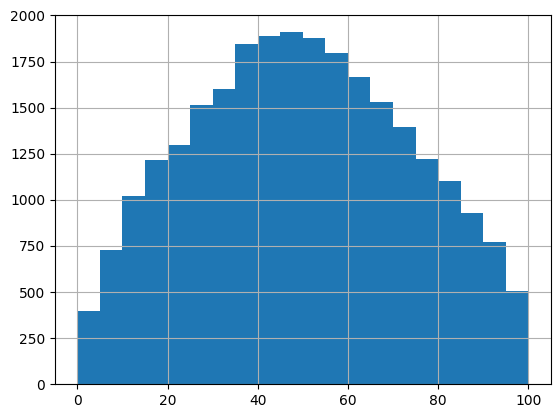

In [ ]:
hotness = df['hotness_score']
hotness.hist(bins = 20)

<Axes: >

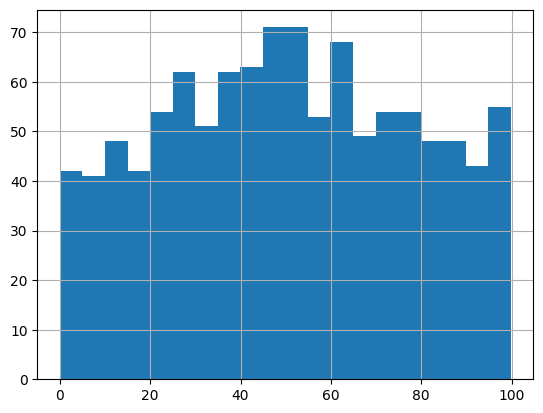

In [ ]:
hotness_outliers = outliers['hotness_score']
hotness_outliers.hist(bins = 20)

Next I tried making histograms comparing the distribution over the median_listing_price feature because I noticed the greatest difference in the mean and standard deviation values. To my surprise they followed similar distribution patterns unlike the hottness_score feature compared before.

<Axes: >

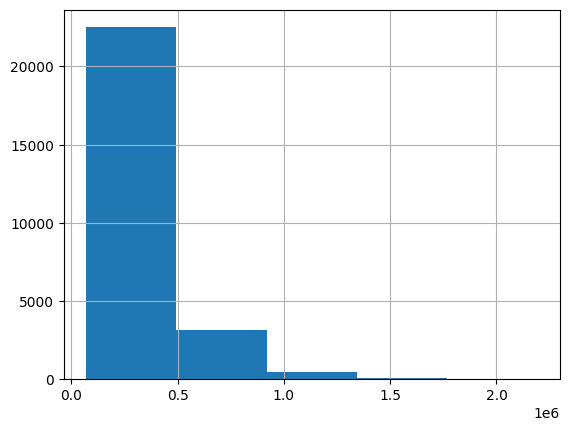

In [ ]:
price = df['median_listing_price']
price.hist(bins = 5)

<Axes: >

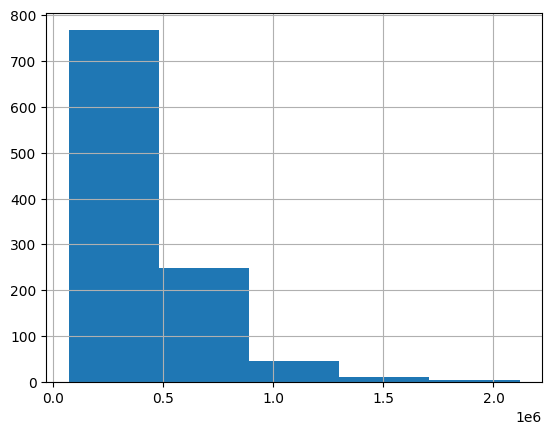

In [ ]:
price_outliers = outliers['median_listing_price']
price_outliers.hist(bins = 5)

My next idea was to look at a specific month and see how that data compared to looking at the entire dataset. I chose the latest month recorded just to get a look at the data and see if I could learn anything new from just a single month. I first just used the .describe() method to see how the values compared to the whole dataset. At first glance nothing seemed too drastically different but I kept looking to see if there was anything else that could be learned.

In [ ]:
month = df.loc[df['month_date_yyyymm'] == 202502]
print(month.describe())

       month_date_yyyymm     cbsa_code     hh_rank  hotness_rank  \
count              290.0    290.000000  290.000000    290.000000   
mean            202502.0  30241.644828  149.624138    151.496552   
std                  0.0  11427.567867   86.427921     85.936657   
min             202502.0  10180.000000    1.000000      1.000000   
25%             202502.0  19870.000000   76.250000     78.250000   
50%             202502.0  29720.000000  149.500000    151.000000   
75%             202502.0  40200.000000  223.750000    225.000000   
max             202502.0  49740.000000  300.000000    300.000000   

       hotness_rank_mm  hotness_rank_yy  hotness_score  supply_score  \
count       290.000000       290.000000     290.000000    290.000000   
mean        151.496552        -0.527586      49.505824     49.485642   
std          85.936657        40.035809      22.525256     29.027415   
min           1.000000      -124.000000       0.334448      0.000000   
25%          78.250000     

Like with the whole dataset, I again made histogram distributions for the median listing price and hotness score feature values on the month data. The histograms for the month data look similar to the histograms for the entire dataset, which seems to indicate that these features have followed a similar trend for a number of years. Looking at how they are distributed also makes sense. For the median listing price feature the largest portion of houses are being listed below $500,000 which makes sense because that is the market that most americans are buying in. It also makes sense that as the price increases there are fewer and fewer houses being listed because there is less demand for houses at those prices. The hotness_score feature is less straight forward but I think still makes sense. It makes sense that a majority of the houses would have a score in the 40 to 60 range, meaning they are about average in their desireability. It also makes sense that there would be fewer highly desirable homes and fewer not desirable homes.

<Axes: >

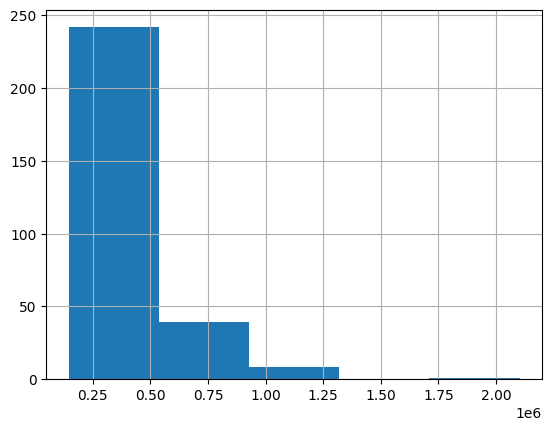

In [ ]:
price = month['median_listing_price']
price.hist(bins = 5)

<Axes: >

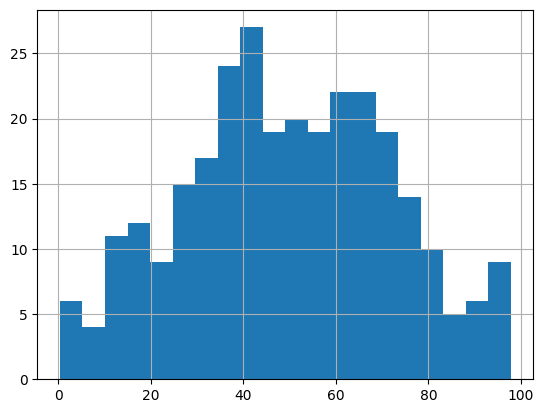

In [ ]:
hotness = month['hotness_score']
hotness.hist(bins = 20)

My next thought was to look for and confirm my suspicions of obviously correlated features. I started with the hotness_rank, hotness_rank_mm, hotness_rank_yy, and hotness_score features. The distributions are similar to what I would expect for the hotness_rank and hotness_rank. The distribution for hotness_rank_yy is a little more interesting because it seems to suggest that for the most part the ranks have not changed much since last year. Another interesting part of this pair plot is the hotness_rank_mm vs hotness_rank plot which seems to suggest a high degree of correlation. I suspected them to be correlated but after doing a bit of digging into the data found that both values are the same. I am not sure if this means that the ranks do not change at all from month to month, which seems unlikely, or something else. It could be duplicate data or there might be an error in how it is entered into the dataset. In any case it could be something to think about for the inference task.

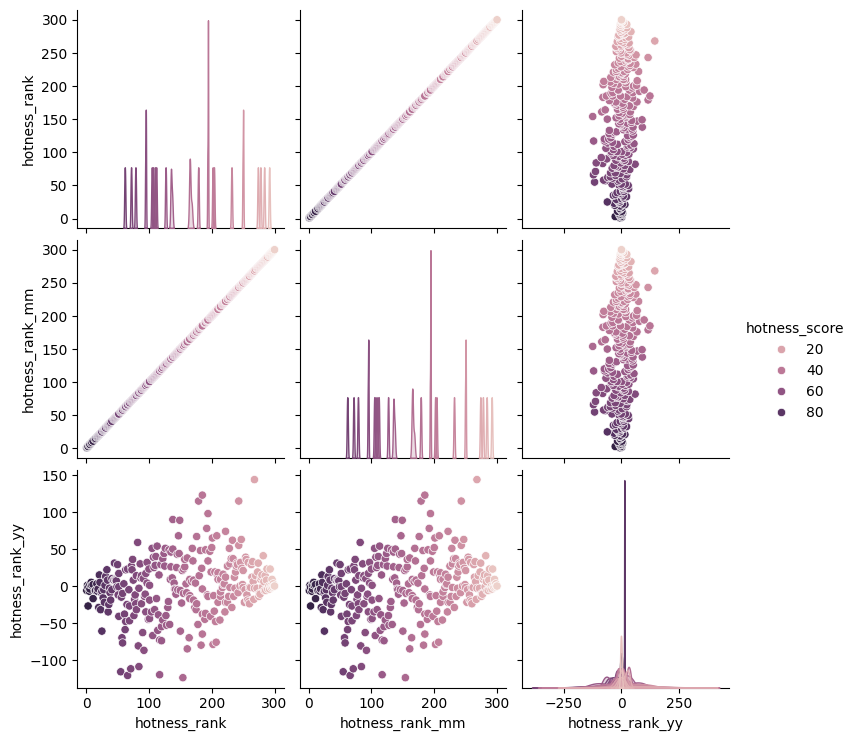

In [ ]:
import seaborn as sns
hotness = month[['hotness_rank', 'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score']]
sns.pairplot(hotness, hue='hotness_score')

Next I looked at the median_listing_price, median_listing_price_mm, median_listing_price_yy, and median_listing_price_vs_us features in a pairplot. Looking at the distributions, the median listing prices stay pretty much the same from the previous month. This makes sense as typically there is not a massive change in listing prices for any given area from month to month. For median_listing_price_yy the distribution is a little wider but is still only changing in small degrees from year to year. I was a little suprised to find that the features were not nearly as obviously correlated as I thought.

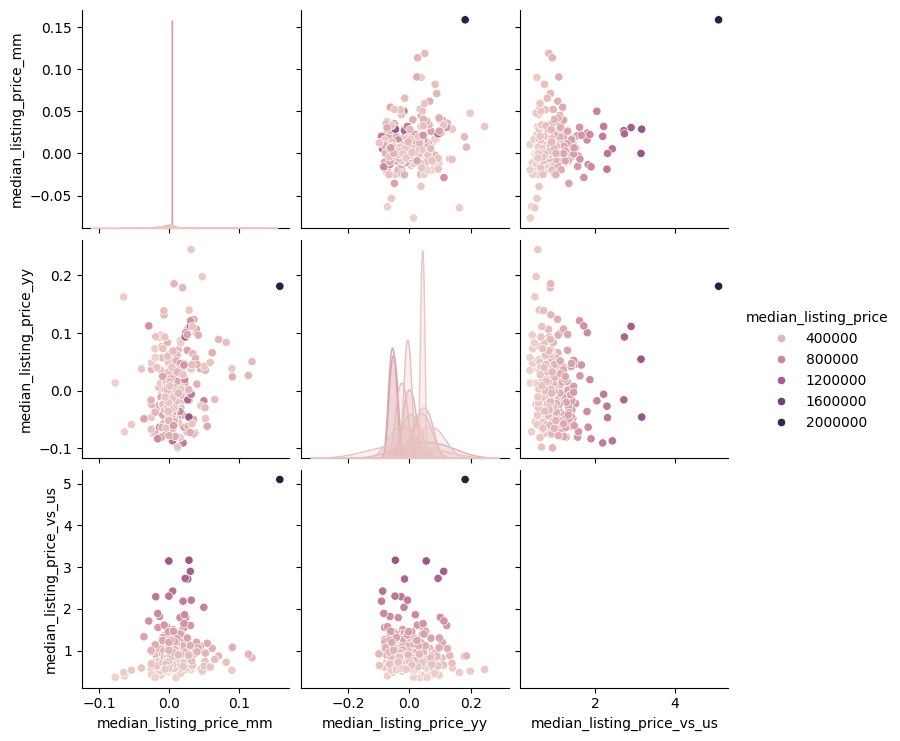

In [ ]:
price = month[['median_listing_price', 'median_listing_price_mm', 'median_listing_price_yy', 'median_listing_price_vs_us']]
sns.pairplot(price, hue='median_listing_price')

I also decided to look at the median_days_on_market, median_dom_yy_day, median_dom_vs_us, page_view_count_per_property_mm, page_view_count_per_property_yy, and page_view_count_per_property_vs_us features. Again the distributions showed that there was not a large degree of change from month to month or year to year. Supprisingly, there was not much correlations between any of the features, or at least not nearly as much as I was expecting.

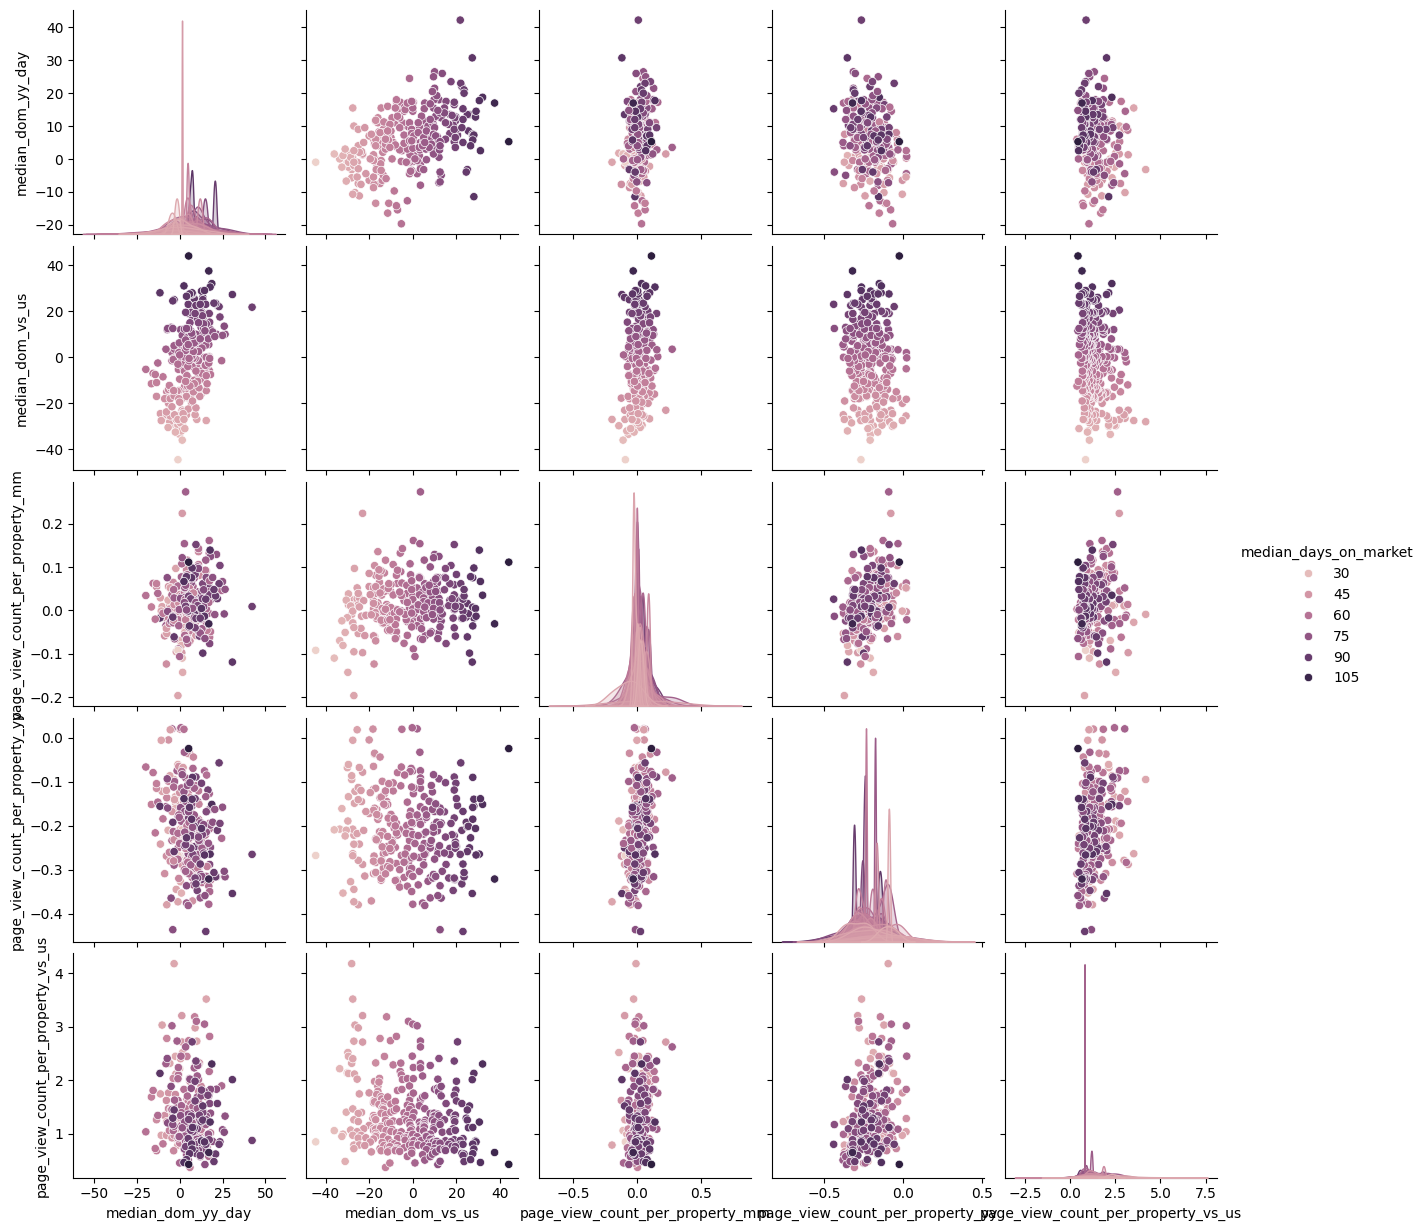

In [ ]:
dom = month[['median_days_on_market', 'median_dom_yy_day', 'median_dom_vs_us', 'page_view_count_per_property_mm', 'page_view_count_per_property_yy', 'page_view_count_per_property_vs_us']]
sns.pairplot(dom, hue='median_days_on_market')

I thought that maybe hotness score could be correlated to the median days on the market and the median listing price so I made a pair plot. From my observations, however, there did not appear to be any clear correlations between these features.

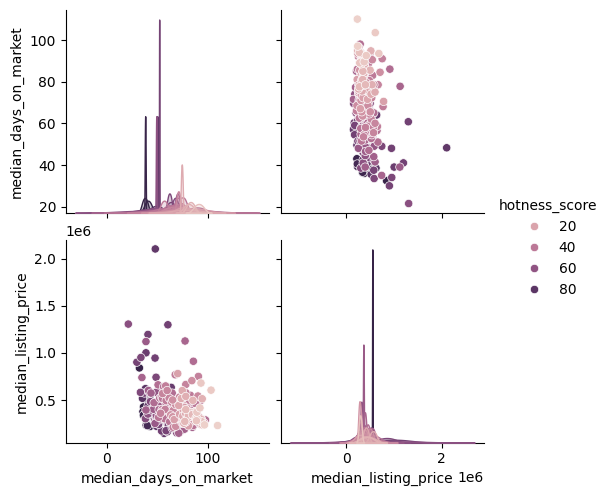

In [ ]:
test = month[['hotness_score', 'median_days_on_market', 'median_listing_price']]
sns.pairplot(test, hue='hotness_score')

I also thought it would be interesting to look at a full year of data to compare to the whole dataset and just a month of data. I chose the latest full year of data entered and used the .describe() method. I compared these values with the month and the whole dataset values and found them to be fairly similar. Nothing immediately stuck out to me that would be different but I thought it would be a good idea to perform the same analysis.

In [ ]:
year = df.loc[(df['month_date_yyyymm'] > 202400) & (df['month_date_yyyymm'] < 202500)]
print(year.describe())

       month_date_yyyymm     cbsa_code     hh_rank  hotness_rank  \
count        3427.000000   3427.000000  3427.00000   3427.000000   
mean       202406.495769  30218.034432   149.50890    149.228480   
std             3.474899  11507.451451    86.69544     86.139405   
min        202401.000000  10180.000000     1.00000      1.000000   
25%        202403.000000  19780.000000    75.00000     75.000000   
50%        202407.000000  29700.000000   148.00000    149.000000   
75%        202410.000000  40220.000000   225.00000    223.500000   
max        202412.000000  49740.000000   300.00000    300.000000   

       hotness_rank_mm  hotness_rank_yy  hotness_score  supply_score  \
count      3427.000000      3427.000000    3427.000000   3427.000000   
mean        149.228480        -0.385177      50.009857     49.692536   
std          86.139405        42.614831      24.669909     28.810911   
min           1.000000      -170.000000       0.167224      0.000000   
25%          75.000000     

I started again with the median listing price and hotness score features and made histograms for them. I found that the distributions are fairly similar to the month and the whole dataset. This seems to suggest that the data not only follows the same trend from month to month but also year to year which makes sense given the whole dataset distributions. Same with the hotness score, the data follows the same trend for a year and a month.

<Axes: >

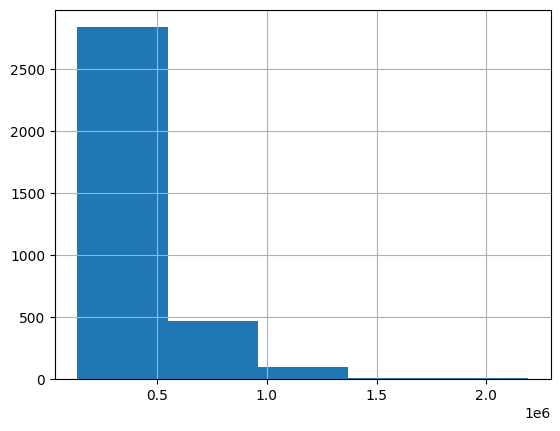

In [ ]:
price = year['median_listing_price']
price.hist(bins = 5)

<Axes: >

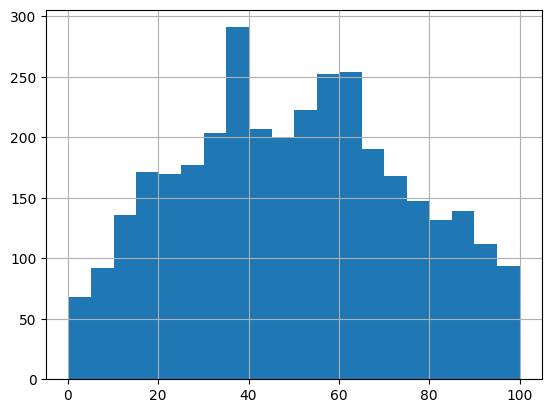

In [ ]:
hotness = year['hotness_score']
hotness.hist(bins = 20)

I then tried to make a pair plot for the hotness features. The plot looks very similar to the month pair plot and does not seem to suggest anything new. After trying the other pair plots on the year data I found that the same can be said for the rest of the pair plots.

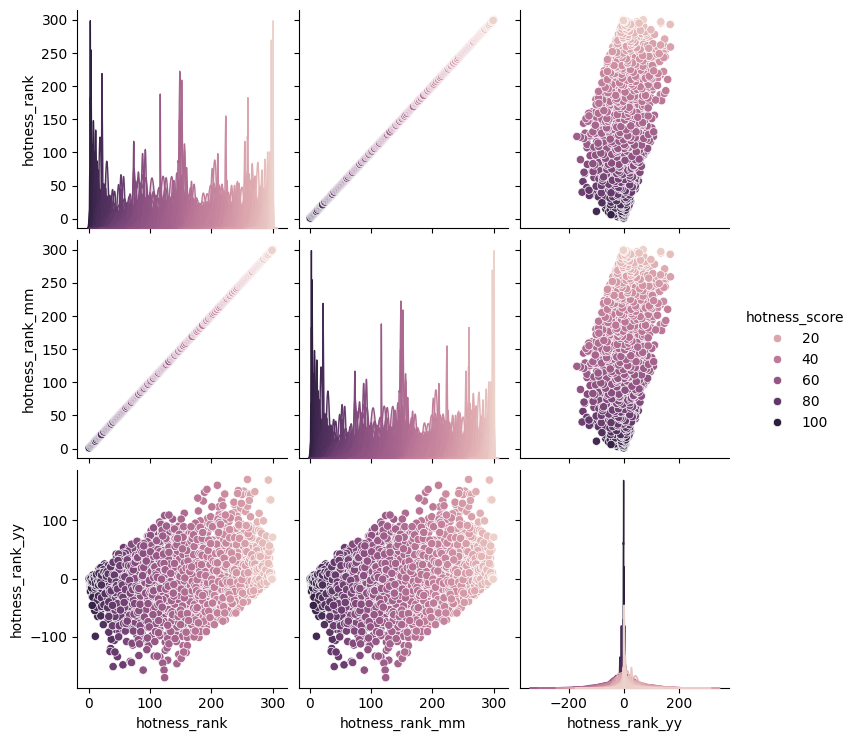

In [ ]:
hotness = year[['hotness_rank', 'hotness_rank_mm', 'hotness_rank_yy', 'hotness_score']]
sns.pairplot(hotness, hue='hotness_score')

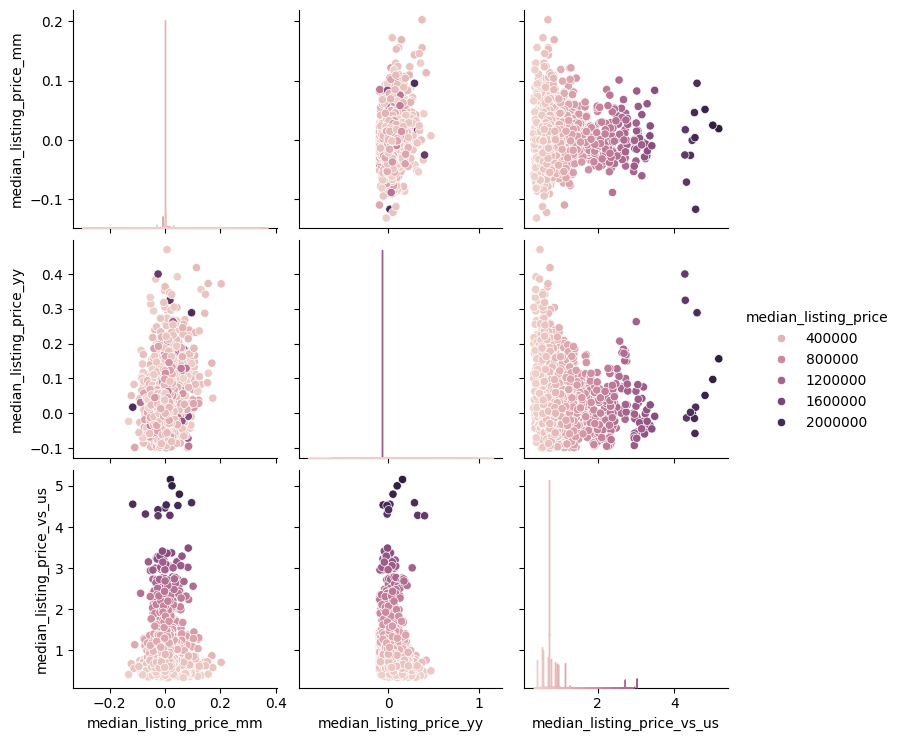

In [ ]:
price = year[['median_listing_price', 'median_listing_price_mm', 'median_listing_price_yy', 'median_listing_price_vs_us']]
sns.pairplot(price, hue='median_listing_price')

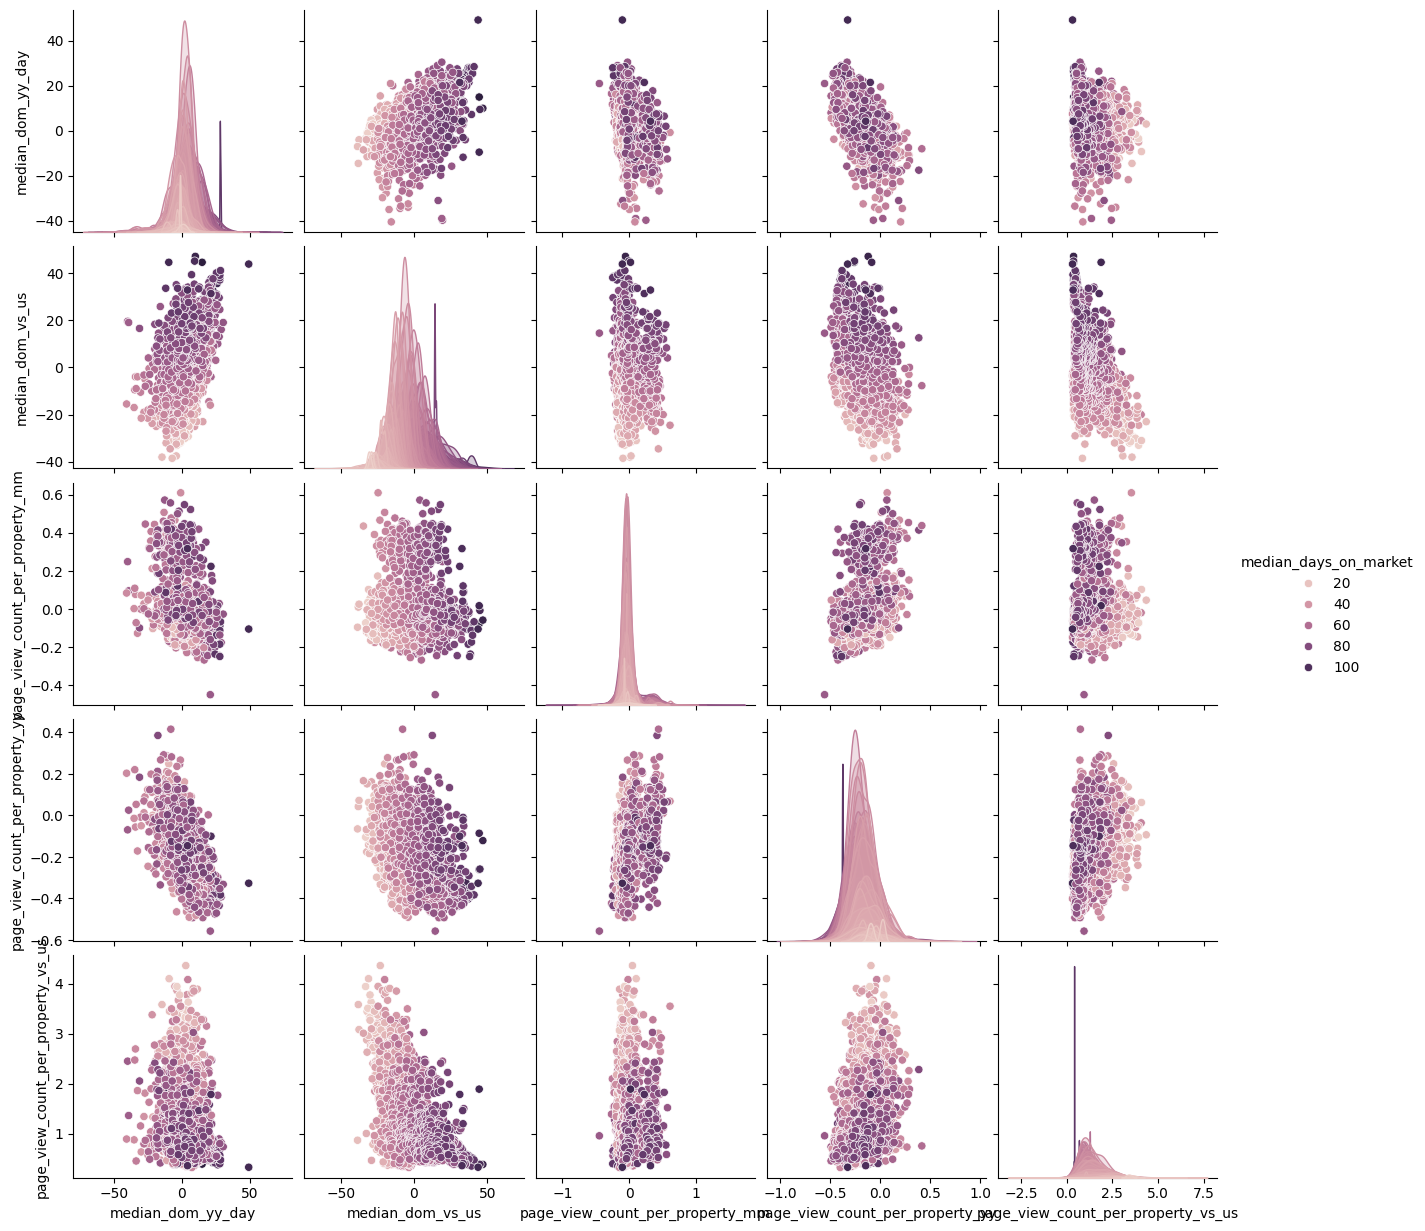

In [ ]:
dom = year[['median_days_on_market', 'median_dom_yy_day', 'median_dom_vs_us', 'page_view_count_per_property_mm', 'page_view_count_per_property_yy', 'page_view_count_per_property_vs_us']]
sns.pairplot(dom, hue='median_days_on_market')

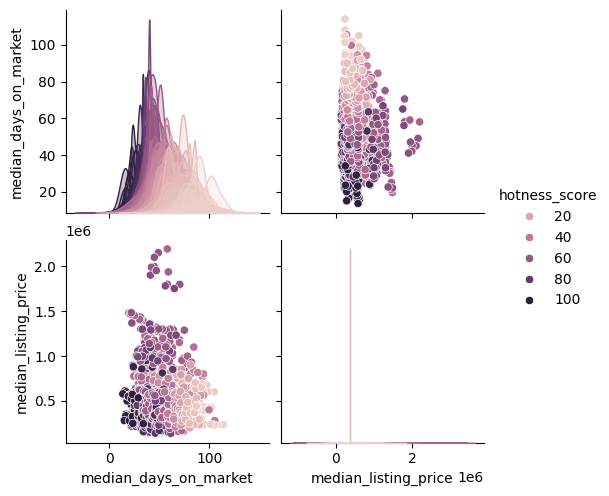

In [ ]:
test = year[['hotness_score', 'median_days_on_market', 'median_listing_price']]
sns.pairplot(test, hue='hotness_score')

After completing those analyses I decided to look at the data across years. I first divided the dataset into years and plotted the mean value of the median listing price feature across all the full years of data. I found that the means have an increasing trend as time progresses. However, it does seem to be flattening out in the past couple of years.

In [ ]:
years = []
for i in range(201800, 202500, 100):
  year = df.loc[(df['month_date_yyyymm'] > i) & (df['month_date_yyyymm'] < i+100)]
  years.append(year)

In [ ]:
prices = []
for year in years:
  prices.append(year['median_listing_price'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

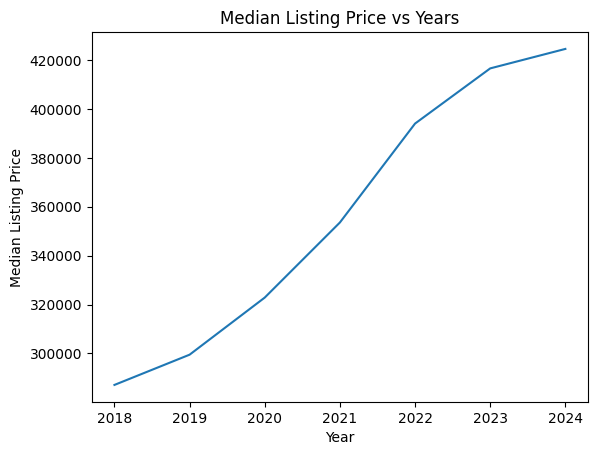

In [ ]:
import matplotlib.pyplot as plt
x_data = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.plot(x_data, prices)
plt.xlabel("Year")
plt.ylabel("Median Listing Price")
plt.title("Median Listing Price vs Years")
plt.show

Next I decided to create a histogram for the distribution of the median listing prices across the years. Knowing that the majority of the data falls under \$500,000 I decided to make bins of size $50,000 up to \$500,000 and then used some larger bins for the larger prices. I found that I needed to adjust the bin sizes and needed to figure out which year was which.

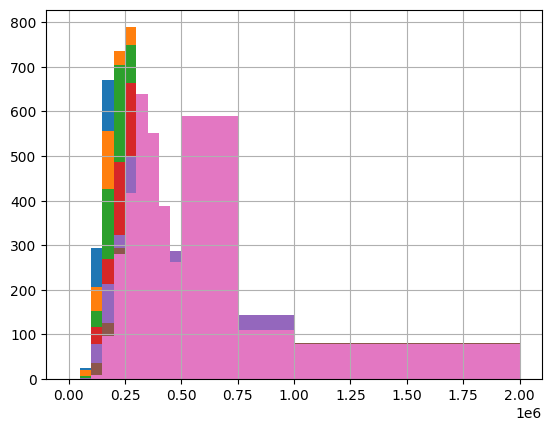

In [ ]:
for year in years:
  year['median_listing_price'].hist(bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 750000, 1000000, 2000000])

My next histogram I made a legend to display which color corresponded to which year and made bins of size \$50,000 up until $750,000. I still felt the binning was not quite right.

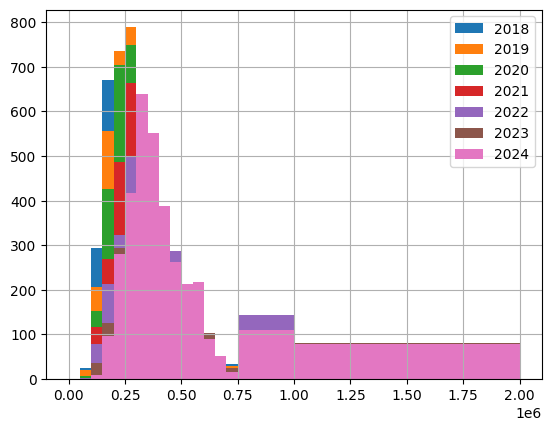

In [ ]:
for i in range(len(years)):
  years[i]['median_listing_price'].hist(bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000, 1000000, 2000000],
                                        label = f"{2018+i}")
  plt.legend(loc='upper right')

I next decided to try creating bins of size \$50,000 all the way to $2,000,000 which produced a much nicer histogram. It is very interesting to observe the variances in distributions between years. It seems to fluctuate quite a bit and does not suggest an immediately obvious pattern.

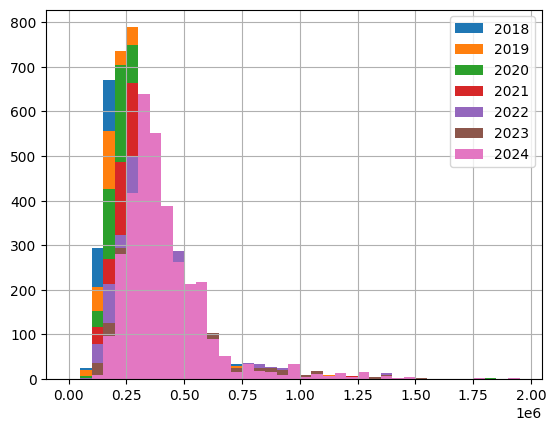

In [ ]:
for i in range(len(years)):
  years[i]['median_listing_price'].hist(bins = range(0, 2000000, 50000),
                                        label = f"{2018+i}")
  plt.legend(loc='upper right')

My next idea was to compare the hotness scores across years. I calculated the mean values of the hotness scores for each year and plotted them. I found that there is a 1.5 point drop in 2021 but quickly rebounds to the previous value the next year. I am not exactly sure what this means but it could suggest that some factor, internal or external to the housing market that effected the market negatively.

In [ ]:
hotness_scores = []
for year in years:
  hotness_scores.append(year['hotness_score'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

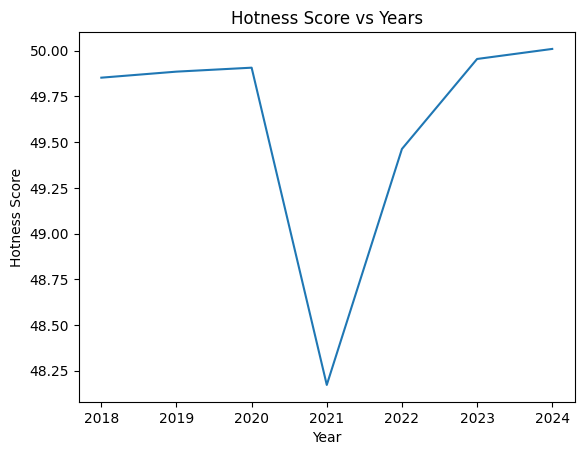

In [ ]:
import matplotlib.pyplot as plt
x_data = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.plot(x_data, hotness_scores)
plt.xlabel("Year")
plt.ylabel("Hotness Score")
plt.title("Hotness Score vs Years")
plt.show

Then I thought to look at the distributions and see how they compare. I first just made 5 equal bins and looked at the distributions. I didn't feel that this plot gave enough information and that a higher bin count would be more informative.

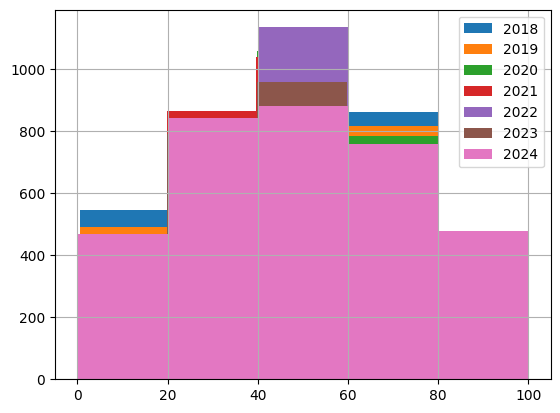

In [ ]:
for i in range(len(years)):
  years[i]['hotness_score'].hist(bins = 5,
                                 label = f"{2018+i}")
  plt.legend(loc='upper right')

I increased the bin count to 10 and was able to see more information. Similar to the listing prices I noticed a large degree of variance and not any clear pattern or reason as to why.

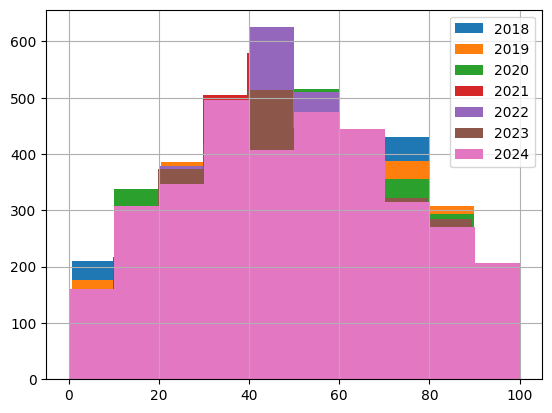

In [ ]:
for i in range(len(years)):
  years[i]['hotness_score'].hist(bins = 10,
                                 label = f"{2018+i}")
  plt.legend(loc='upper right')

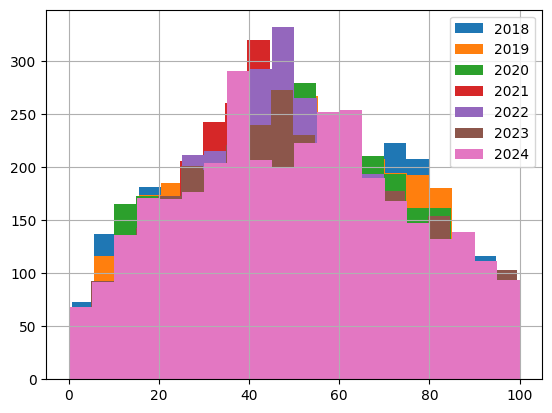

In [ ]:
for i in range(len(years)):
  years[i]['hotness_score'].hist(bins = 20,
                                 label = f"{2018+i}")
  plt.legend(loc='upper right')

My next thought was to look at the top ranked regions within a given year to see if I could determine any trends or commonalities. I just looked at the first full year of data and printed out the rank 1 entry for each month. As I expected, I noticed they all had similar listing prices and hotness scores. I found it interesting that there were many repeat rank 1's within a given year. Also, specifically within this year many of the winners were in the same two states Calafornia and Texas. This suggests that a given, or several, geographical areas are very hot within a given year.

In [ ]:
top = years[0].loc[years[0]['hotness_rank'] == 1]
print(top)

       month_date_yyyymm  cbsa_code                         cbsa_title  \
22200             201812      17020                          Chico, CA   
22500             201811      33260                        Midland, TX   
22800             201810      28450                        Kenosha, WI   
23100             201809      23060                     Fort Wayne, IN   
23400             201808      33260                        Midland, TX   
23700             201807      33260                        Midland, TX   
24000             201806      33260                        Midland, TX   
24300             201805      33260                        Midland, TX   
24600             201804      33260                        Midland, TX   
24900             201803      46700                        Vallejo, CA   
25200             201802      46700                        Vallejo, CA   
25500             201801      46700                        Vallejo, CA   
25501             201801      41860  S

I also wanted to take a look at how median listing price compared to hotness score. I made a scatter plot of the first full year of data comparing these two features. I noticed that for listing prices under $500,000 the hotness scores range from 0 to 100 without any trend or pattern.

<Axes: xlabel='median_listing_price', ylabel='hotness_score'>

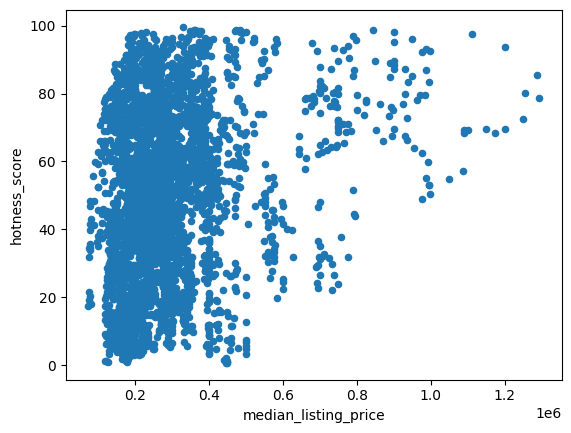

In [ ]:
test = years[0][['median_listing_price', 'hotness_score']]
test.plot.scatter(x='median_listing_price', y='hotness_score')

I checked median listing price against hotness rank just to see if that would yield any new insights. As I kind of suspected it is just an upside down version of the previous graph because the lower the rank the better the score.

<Axes: xlabel='median_listing_price', ylabel='hotness_rank'>

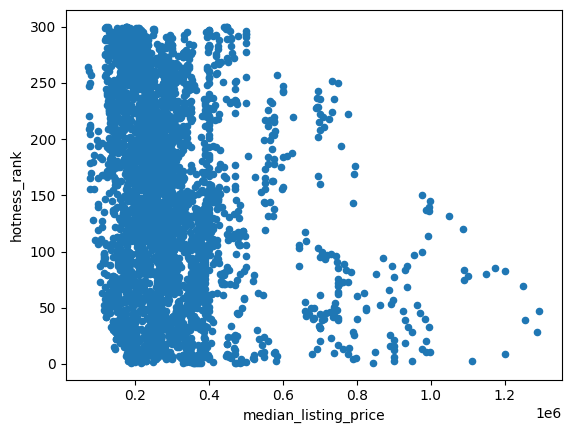

In [ ]:
test = years[0][['median_listing_price', 'hotness_rank']]
test.plot.scatter(x='median_listing_price', y='hotness_rank')

My next thought was to narrow down the graph to just focus on the listing prices that are greater than $500,000. It appears that as the listing price increases the hotness score also increases generally.

<Axes: xlabel='median_listing_price', ylabel='hotness_score'>

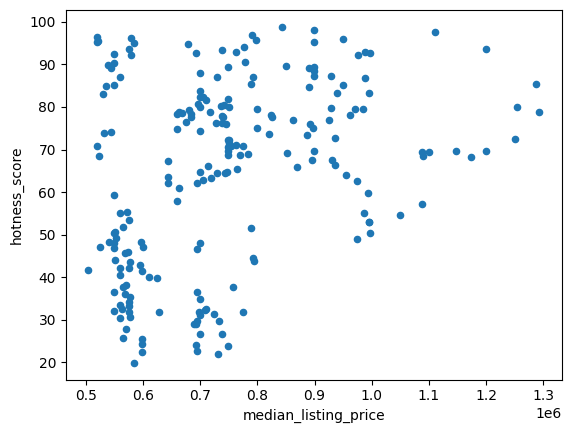

In [ ]:
test = years[0][['median_listing_price', 'hotness_score']]
test = test.loc[test['median_listing_price'] > 500000]
test.plot.scatter(x='median_listing_price', y='hotness_score')

I also wanted to check the correlation between median days on market and hotness score. I used a scatter plot to visualize the data for the first full year of data. I found that the median days on market feature is negatively correlated to the hotness score feature, so as the number of median days on market increases, the hotness score decreases. This makes sense because the hotter a house on the market is, usually the faster it will sell.

<Axes: xlabel='median_days_on_market', ylabel='hotness_score'>

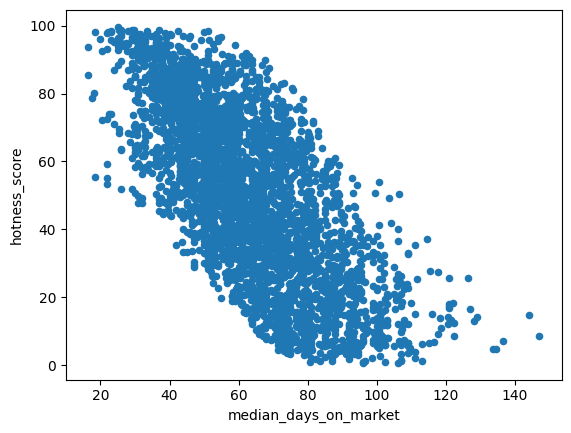

In [ ]:
test = years[0][['median_days_on_market', 'hotness_score']]
test.plot.scatter(x='median_days_on_market', y='hotness_score')

Based on these observations I decided to take a look at the rank 1 for each month in each year. First I made a list of dataframes with just the rank 1 entries for each month. Then I calculated the means of the listing prices for the rank 1's for each year. Finally I plotted the mean listing prices for each year. I found it fluctuates quite a bit and does not follow any obvious trends.

In [ ]:
top_ranks = []
for year in years:
  top_ranks.append(year.loc[year['hotness_rank'] == 1])

In [ ]:
top_means = []
for top in top_ranks:
  top_means.append(top['median_listing_price'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

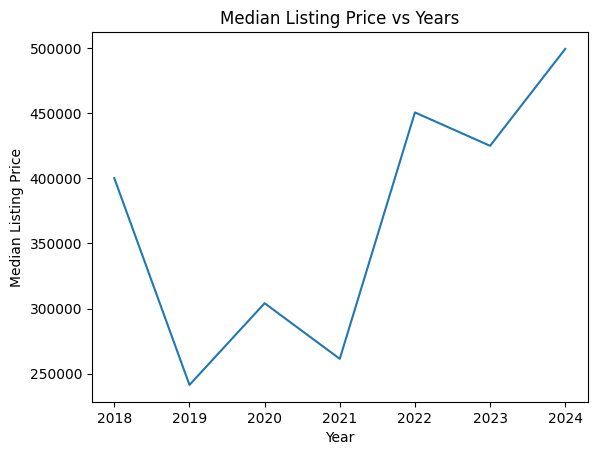

In [ ]:
import matplotlib.pyplot as plt
x_data = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.plot(x_data, top_means)
plt.xlabel("Year")
plt.ylabel("Median Listing Price")
plt.title("Median Listing Price vs Years")
plt.show

I also checked the median days on market for the top ranked entries according to hotness rank. I calculated the mean value of the median days on market feature for each year. Then I graphed the mean value over the years. I found that there is a large fluctuation and no obvious consistent trend. I thought it was interesting that the value stayed the same from 2021 to 2022.

In [ ]:
top_means = []
for top in top_ranks:
  top_means.append(top['median_days_on_market'].mean())

<function matplotlib.pyplot.show(close=None, block=None)>

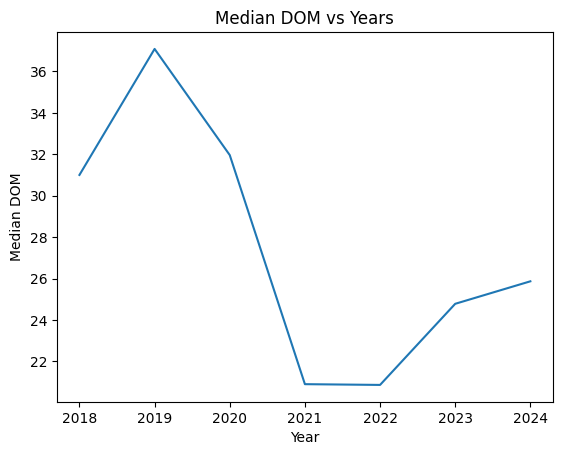

In [ ]:
x_data = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
plt.plot(x_data, top_means)
plt.xlabel("Year")
plt.ylabel("Median DOM")
plt.title("Median DOM vs Years")
plt.show

I decided to look a little deeper and find which geographical areas appeared the most in each year. I first found the area code that appeared the most times in a given year. Then I found all the entries in a year that matched that area code. After that I used the .describe() method to look at the best area for each year and look for commonalities. As expected I found a high mean value for the hotness score and a low mean value for days on the market and hotness rank. Also I found that there was relatively low standard deviation meaning the geographical area stayed hot the whole year.

In [ ]:
frequents = []
for top in top_ranks:
  most_frequent = top['cbsa_code'].value_counts().idxmax()
  frequents.append(most_frequent)

In [ ]:
bests = []
for i in range(len(years)):
  bests.append(years[i].loc[years[i]['cbsa_code'] == frequents[i]])

In [ ]:
for best in bests:
  print(best.describe())

       month_date_yyyymm  cbsa_code  hh_rank  hotness_rank  hotness_rank_mm  \
count          12.000000       12.0     12.0     12.000000        12.000000   
mean       201806.500000    33260.0    271.0      2.250000         2.250000   
std             3.605551        0.0      0.0      1.602555         1.602555   
min        201801.000000    33260.0    271.0      1.000000         1.000000   
25%        201803.750000    33260.0    271.0      1.000000         1.000000   
50%        201806.500000    33260.0    271.0      1.500000         1.500000   
75%        201809.250000    33260.0    271.0      3.250000         3.250000   
max        201812.000000    33260.0    271.0      5.000000         5.000000   

       hotness_rank_yy  hotness_score  supply_score  demand_score  \
count         5.000000      12.000000     12.000000     12.000000   
mean        -15.400000      97.561315     95.763657     99.358974   
std           3.209361       1.531735      3.096076      0.389465   
min         

After these observations I decided to look at the titles of which areas are most popular. I observed that Texas, New York, and New Hampshire were hot. Additionally I noticed that New York and New Hampshire remained hot across multiple years. These observations reinforce my earlier observations that certain geographical areas are hot, some more than others. I think finding a way to map the area codes with other area codes in close proximity could lend insights into the data. Or having some kind of longitude and latitude values to be able to compare to other locations would be helpful.

In [ ]:
for best in bests:
  print(best['cbsa_title'])

22201    Midland, TX
22500    Midland, TX
22802    Midland, TX
23104    Midland, TX
23400    Midland, TX
23700    Midland, TX
24000    Midland, TX
24300    Midland, TX
24600    Midland, TX
24903    Midland, TX
25201    Midland, TX
25504    Midland, TX
Name: cbsa_title, dtype: object
18600    Fort Wayne, IN
18900    Fort Wayne, IN
19200    Fort Wayne, IN
19500    Fort Wayne, IN
19800    Fort Wayne, IN
20100    Fort Wayne, IN
20400    Fort Wayne, IN
20701    Fort Wayne, IN
21028    Fort Wayne, IN
21311    Fort Wayne, IN
21610    Fort Wayne, IN
21904    Fort Wayne, IN
Name: cbsa_title, dtype: object
15008    Rochester, NY
15305    Rochester, NY
15601    Rochester, NY
15903    Rochester, NY
16201    Rochester, NY
16500    Rochester, NY
16800    Rochester, NY
17103    Rochester, NY
17410    Rochester, NY
17701    Rochester, NY
18000    Rochester, NY
18300    Rochester, NY
Name: cbsa_title, dtype: object
12000    Rochester, NY
12300    Rochester, NY
12600    Rochester, NY
12902    Rochester,

# Inference

*** The following code is from Liam Grossman ***

In [ ]:
from scipy.stats import zscore

df['zscore_listing_price'] = zscore(df['median_listing_price'])
df['zscore_days_on_market'] = zscore(df['median_days_on_market'])

z_threshold = 3
filtered_data = df[(df['zscore_listing_price'].abs() <= z_threshold) &
                    (df['zscore_days_on_market'].abs() <= z_threshold)]


*** The following code is my own ***

In [ ]:
filtered_data.describe()

,month_date_yyyymm,cbsa_code,hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,median_days_on_market,...,page_view_count_per_property_mm,page_view_count_per_property_yy,page_view_count_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,zscore_listing_price,zscore_days_on_market
count,25550.000000,25550.000000,25550.000000,25550.000000,25550.000000,22064.000000,25550.000000,25550.000000,25550.000000,25550.000000,...,25256.000000,22064.000000,25550.000000,25550.000000,25550.000000,25550.000000,25550.000000,25550.0,25550.000000,25550.000000
mean,202087.899256,29897.347671,150.633973,150.836243,150.836243,-0.906409,49.544529,49.116389,49.972668,54.617710,...,0.013721,0.113970,1.202984,334950.897552,0.005107,0.073781,0.930364,0.0,-0.094901,-0.000801
std,221.828562,11540.208818,86.651770,86.482257,86.482257,52.119640,24.034283,28.667929,28.889506,18.170505,...,0.147997,0.444070,0.482853,140855.175518,0.032474,0.088983,0.377623,0.0,0.756965,0.980308
min,201708.000000,10180.000000,1.000000,1.000000,1.000000,-238.000000,0.000000,0.000000,0.000000,5.000000,...,-0.451034,-0.671263,0.227354,69900.000000,-0.182864,-0.099930,0.249883,0.0,-1.519302,-2.677703
25%,201905.000000,19460.000000,75.250000,76.000000,76.000000,-28.000000,31.103679,24.080268,25.083612,41.000000,...,-0.071714,-0.198801,0.860985,237377.045455,-0.011908,0.012380,0.686016,0.0,-0.619270,-0.735484
50%,202104.000000,29420.000000,149.000000,152.000000,152.000000,-1.000000,48.829431,48.829431,49.832776,52.500000,...,-0.021105,0.007167,1.116271,309000.000000,0.000308,0.060779,0.858921,0.0,-0.234363,-0.115053
75%,202303.000000,39900.000000,226.000000,226.000000,226.000000,25.000000,67.892977,73.578595,74.916388,66.500000,...,0.044294,0.288949,1.449009,399819.375000,0.019117,0.120172,1.095396,0.0,0.253706,0.640255
max,202502.000000,49740.000000,300.000000,300.000000,300.000000,244.000000,100.000000,100.000000,100.000000,110.000000,...,0.912634,3.607938,4.361345,910000.000000,0.911111,0.499233,3.334604,0.0,2.995449,2.987103


In [ ]:
df.describe()

,month_date_yyyymm,cbsa_code,hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,median_days_on_market,...,page_view_count_per_property_mm,page_view_count_per_property_yy,page_view_count_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,zscore_listing_price,zscore_days_on_market
count,26221.000000,26221.000000,26221.000000,26221.000000,26221.000000,22652.000000,26221.000000,26221.000000,26221.000000,26221.000000,...,25924.000000,22652.000000,26221.000000,2.622100e+04,26221.000000,26221.000000,26221.000000,26221.0,2.622100e+04,2.622100e+04
mean,202089.247855,30095.759773,149.848976,150.434842,150.434842,-0.795868,49.630361,49.215818,50.044904,54.632556,...,0.013924,0.111122,1.203710,3.526101e+05,0.005144,0.073890,0.976433,0.0,-2.991645e-16,1.907716e-16
std,222.004472,11535.934827,86.729672,86.225266,86.225266,52.106351,23.950493,28.779609,28.858957,18.535852,...,0.148524,0.442051,0.481241,1.860825e+05,0.032718,0.089567,0.492608,0.0,1.000019e+00,1.000019e+00
min,201708.000000,10180.000000,1.000000,1.000000,1.000000,-238.000000,0.000000,0.000000,0.000000,5.000000,...,-0.451034,-0.671263,0.227354,6.990000e+04,-0.182864,-0.099930,0.249883,0.0,-1.519302e+00,-2.677703e+00
25%,201906.000000,19740.000000,75.000000,76.000000,76.000000,-28.000000,31.270903,24.414716,25.083612,41.000000,...,-0.071856,-0.200137,0.861971,2.390000e+05,-0.011973,0.012128,0.690085,0.0,-6.105477e-01,-7.354837e-01
50%,202104.000000,29620.000000,149.000000,151.000000,151.000000,-1.000000,49.163880,48.829431,50.167224,52.500000,...,-0.021279,0.004635,1.118665,3.122252e+05,0.000308,0.060816,0.866968,0.0,-2.170305e-01,-1.150525e-01
75%,202304.000000,40220.000000,225.000000,225.000000,225.000000,25.000000,67.892977,73.913043,74.916388,66.500000,...,0.044469,0.285254,1.451212,4.072500e+05,0.019238,0.120443,1.122187,0.0,2.936385e-01,6.402549e-01
max,202502.000000,49740.000000,300.000000,300.000000,300.000000,244.000000,100.000000,100.000000,100.000000,147.000000,...,0.912634,3.607938,4.361345,2.191000e+06,0.911111,0.499233,5.597015,0.0,9.879625e+00,4.983273e+00


I got Liam's code to help remove outliers in the data to hopefully make the inference tasks easier and get more accurate results. Liam's code uses zscore on listing price and days on the market to filter out data entries that are outside the zscore threshold. I compared the before and after filtering data just to see how things like the mean and std deviation changed after filtering. The biggest reduction that I noticed was the listing price. There is a noticable difference in the std deviation in the listing price after the filtering.

My first idea for a learning task is to try to predict days on market using only listing price as a feature with a linear regression model from sklearn. To try to get a measure of how well the model is performing I decided to use mean squared error to measure the loss of the predictions. My first iteration of the model yielded a large mean squared error loss. My model on average was off by about three hundred days in its prediction compared to the actual label. I also looked at the r2 value which suggests that the listing price is not very predictive of days on market.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
xtrain, xtest, ytrain, ytest = train_test_split(filtered_data[['median_listing_price']], filtered_data['median_days_on_market'], random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

297.5934327235591
0.047078523147189855


After looking at the results and the dataset, in particular the feature values, I noticed there is a large range in values between features. This caused me to realize that normalizing the data would probably be helpful. I decided to use the scaled value formula we learned in class to normalize the listing price feature values.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(filtered_data[['median_listing_price']])
scaled_df = pd.DataFrame(scaled_df, columns=filtered_data[['median_listing_price']].columns)
print(scaled_df.describe())

       median_listing_price
count          2.555000e+04
mean          -1.179139e-16
std            1.000020e+00
min           -1.881763e+00
25%           -6.927382e-01
50%           -1.842418e-01
75%            4.605422e-01
max            4.082636e+00


I then retrained the model on the normalized listing price feature values to see if the model would yield different results. They appear to be roughly the same. From these results I concluded that normalizing listing prices could still be useful, but using listing prices by itself is not enough to predict days on the market.

In [ ]:
import numpy as np

lp = scaled_df['median_listing_price']
dom = filtered_data['median_days_on_market']
lp_2 = np.array(lp)
lp_2 = lp_2.reshape(-1, 1)
dom_2 = np.array(dom)
dom_2 = dom_2.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(lp_2, dom_2, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

297.59343272355903
0.047078523147189966


My next idea was to use the hotness_score feature to predict days on the market to see if that would yield better results. My intuition was that it would be a determinitive feature for days on market because I expected that the hotter the market, the fewer days on the market. I trained the model and again looked at mean squared error loss and the r2 value to try to measure the performance of the model. While the results are still not great in that the predicted value is roughly 217 days off from the actual value, training on hotness score yielded a lower mean squared error loss. Also, the r2 value for this model is much higher suggesting that hotness score is a more predictive feature.

In [ ]:
hs = filtered_data['hotness_score']
hs_2 = np.array(hs)
hs_2 = hs_2.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(hs_2, dom_2, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

217.33274815341474
0.3040805993483988


Then I thought the model might perform even better if I combined the hotness score and listing price features to combine the model. After training the model, the predictions did prove to be slightly more accurate evidenced by the lower mean squared error value and the higher r2 value.

In [ ]:
lp.reset_index(drop=True, inplace=True)
hs.reset_index(drop=True, inplace=True)
dom.reset_index(drop=True, inplace=True)
lp_and_hs = pd.concat([lp, hs], axis=1)
print(lp_and_hs.describe())

xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

       median_listing_price  hotness_score
count          2.555000e+04   25550.000000
mean          -1.179139e-16      49.544529
std            1.000020e+00      24.034283
min           -1.881763e+00       0.000000
25%           -6.927382e-01      31.103679
50%           -1.842418e-01      48.829431
75%            4.605422e-01      67.892977
max            4.082636e+00     100.000000
203.38609991922863
0.34873904664959554


While I was slowly reducing the mean squared error of the model's predictions, I was hoping to create a model that predicted more accurately. The next feature I thought to train on was the hotness rank feature. The hotness score was predictive so I hoped by training the model on the hotness rank as well would improve the model's accuracy. Unfortunately, the results from the model turned out to be almost the same as without training on hotness rank, implying that hotness rank is not a predictive feature.

In [ ]:
hr = filtered_data['hotness_rank']

lp_and_hs.reset_index(drop=True, inplace=True)
hr.reset_index(drop=True, inplace=True)
lp_and_hs_and_hr = pd.concat([lp_and_hs, hr], axis=1)
print(lp_and_hs_and_hr.describe())

xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs_and_hr, dom, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

       median_listing_price  hotness_score  hotness_rank
count          2.555000e+04   25550.000000  25550.000000
mean          -1.179139e-16      49.544529    150.836243
std            1.000020e+00      24.034283     86.482257
min           -1.881763e+00       0.000000      1.000000
25%           -6.927382e-01      31.103679     76.000000
50%           -1.842418e-01      48.829431    152.000000
75%            4.605422e-01      67.892977    226.000000
max            4.082636e+00     100.000000    300.000000
203.25477155934135
0.3491595721078058


The next feature I tried to train the model on was the cbsa code. I thougth that maybe giving the model some idea of a geographic region might help in predicting days on the market. Similar to training the model with hotness rank, training with cbsa code yielded results that were almost the same as training without. As a result, cbsa code itself does not seem to be a predictive feature for days on the market.

In [ ]:
cbsa = filtered_data['cbsa_code']

lp_and_hs.reset_index(drop=True, inplace=True)
cbsa.reset_index(drop=True, inplace=True)
lp_and_hs_and_cbsa = pd.concat([lp_and_hs, cbsa], axis=1)
print(lp_and_hs_and_cbsa.describe())

xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs_and_cbsa, dom, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

       median_listing_price  hotness_score     cbsa_code
count          2.555000e+04   25550.000000  25550.000000
mean          -1.179139e-16      49.544529  29897.347671
std            1.000020e+00      24.034283  11540.208818
min           -1.881763e+00       0.000000  10180.000000
25%           -6.927382e-01      31.103679  19460.000000
50%           -1.842418e-01      48.829431  29420.000000
75%            4.605422e-01      67.892977  39900.000000
max            4.082636e+00     100.000000  49740.000000
203.47240309903253
0.34846269594923496


My next thought was to perform some sensitivity analysis by trying to change the test set size and see how it affected the output. I first tried increasing the test size from the default of 0.25 to 0.3. The results turned out to be about the same. I again increased the test set size to 0.4 and trained the model. This time the results seemed slighltly worse. In conclusion, I decided that the default 0.25 test set size worked the best for this data set and stuck with that value.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, test_size=0.3, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

204.62555446994685
0.3530876727743898


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, test_size=0.4, random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)
print(mean_squared_error(ytest, y_pred))
print(r2_score(ytest, y_pred))

206.19430452069474
0.3527001611457873


I remembered that in analyzing the data I found that there is variance in the feature values between years. This lead me to try to train a model for each year and compare the results to the previous models. I calculated the mean squared error and the r2 value for the model for each year and then calculated the mean value for both the mean squared error and the r2 value acrross all the models. Each of the models had a noticeably smaller mean squared error and higher r2 value and the mean of all the mean squared errors was smaller and the mean of the r2 values was larger than the previous models. This suggests that time has a noticeable effect on the model's predictions.

In [ ]:
years = []
for i in range(201800, 202500, 100):
  year = filtered_data.loc[(filtered_data['month_date_yyyymm'] > i) & (filtered_data['month_date_yyyymm'] < i+100)]
  years.append(year)

curr_year = 2018
mses = []
r2s = []

for year in years:
  scaled_df = scaler.fit_transform(year[['median_listing_price']])
  scaled_df = pd.DataFrame(scaled_df, columns=year[['median_listing_price']].columns)
  hs = year['hotness_score']
  dom = year['median_days_on_market']
  scaled_df.reset_index(drop=True, inplace=True)
  hs.reset_index(drop=True, inplace=True)
  dom.reset_index(drop=True, inplace=True)
  lp_and_hs = pd.concat([scaled_df['median_listing_price'], hs], axis=1)
  xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, random_state=42)
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  print(f"year: {curr_year}")
  print(f"mse: {mean_squared_error(ytest, y_pred)}")
  print(f"r2: {r2_score(ytest, y_pred)}")
  curr_year += 1
  mses.append(mean_squared_error(ytest, y_pred))
  r2s.append(r2_score(ytest, y_pred))
print(f"mse mean: {np.mean(mses)}")
print(f"r2 mean: {np.mean(r2s)}")

year: 2018
mse: 164.88664644943842
r2: 0.5034863227645482
year: 2019
mse: 159.69531977809586
r2: 0.46337690391362873
year: 2020
mse: 163.3071260183863
r2: 0.4824195276587122
year: 2021
mse: 156.4368650723118
r2: 0.3189823854012538
year: 2022
mse: 178.5127249027358
r2: 0.24349221094155782
year: 2023
mse: 127.33820963926541
r2: 0.39055501550515126
year: 2024
mse: 107.73122128737542
r2: 0.5378013332603774
mse mean: 151.1297304496584
r2 mean: 0.4200162427778899


In light of the data set being somewhat time sensitive I decided to again train a model for each year and this time also give it the features that stored the changes from the previous year. Again, this lead to an improvement in the model's performance. The average of all the models' mean squared errors reduced to about 130. While still not great, it was still a significant improvement from almost 300 with the first model.

In [ ]:
curr_year = 2018
mses = []
r2s = []

for year in years:
  scaled_df = scaler.fit_transform(year[['median_listing_price']])
  scaled_df = pd.DataFrame(scaled_df, columns=year[['median_listing_price']].columns)
  hs = year['hotness_score']
  dom = year['median_days_on_market']
  prev_year = year[['median_days_on_market_yy', 'median_listing_price_yy', 'hotness_rank_yy']].fillna(0)
  prev_lp = prev_year['median_listing_price_yy']
  prev_hr = prev_year['hotness_rank_yy']
  prev_dom = prev_year['median_days_on_market_yy']
  scaled_df.reset_index(drop=True, inplace=True)
  hs.reset_index(drop=True, inplace=True)
  dom.reset_index(drop=True, inplace=True)
  prev_lp.reset_index(drop=True, inplace=True)
  prev_hr.reset_index(drop=True, inplace=True)
  prev_dom.reset_index(drop=True, inplace=True)
  x = pd.concat([scaled_df['median_listing_price'], hs, prev_lp, prev_hr, prev_dom], axis=1)
  xtrain, xtest, ytrain, ytest = train_test_split(x, dom, random_state=42)
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  print(f"year: {curr_year}")
  print(f"mse: {mean_squared_error(ytest, y_pred)}")
  print(f"r2: {r2_score(ytest, y_pred)}")
  curr_year += 1
  mses.append(mean_squared_error(ytest, y_pred))
  r2s.append(r2_score(ytest, y_pred))
print(f"mse mean: {np.mean(mses)}")
print(f"r2 mean: {np.mean(r2s)}")

year: 2018
mse: 160.37068968980935
r2: 0.5170849636808537
year: 2019
mse: 157.5163660946353
r2: 0.47069882714514355
year: 2020
mse: 133.7303902576934
r2: 0.5761591043604011
year: 2021
mse: 106.74621946486947
r2: 0.5353009937024982
year: 2022
mse: 147.4655682966791
r2: 0.3750649927328642
year: 2023
mse: 124.69976406519457
r2: 0.40318270539128487
year: 2024
mse: 103.96319479174363
r2: 0.5539672766304511
mse mean: 133.49888466580356
r2 mean: 0.49020840909192803


I continued looking for other features that might help in the model's predicions. I realized that the page_view_count_per_property_yy feature could be helpful in predicting days on market. I added this feature to the models features to train on, retrained the model, and observed the output. Adding this feature yielded a slightly lower average mean squared error and slightly higher average r2 score indicating that the feature has some predictive power.

In [ ]:
curr_year = 2018
mses = []
r2s = []

for year in years:
  scaled_df = scaler.fit_transform(year[['median_listing_price']])
  scaled_df = pd.DataFrame(scaled_df, columns=year[['median_listing_price']].columns)
  hs = year['hotness_score']
  dom = year['median_days_on_market']
  prev_year = year[['median_days_on_market_yy', 'median_listing_price_yy', 'hotness_rank_yy', 'page_view_count_per_property_yy']].fillna(0)
  prev_lp = prev_year['median_listing_price_yy']
  prev_hr = prev_year['hotness_rank_yy']
  prev_dom = prev_year['median_days_on_market_yy']
  prev_page = prev_year['page_view_count_per_property_yy']
  scaled_df.reset_index(drop=True, inplace=True)
  hs.reset_index(drop=True, inplace=True)
  dom.reset_index(drop=True, inplace=True)
  prev_lp.reset_index(drop=True, inplace=True)
  prev_hr.reset_index(drop=True, inplace=True)
  prev_dom.reset_index(drop=True, inplace=True)
  prev_page.reset_index(drop=True, inplace=True)
  x = pd.concat([scaled_df['median_listing_price'], hs, prev_lp, prev_hr, prev_dom, prev_page], axis=1)
  xtrain, xtest, ytrain, ytest = train_test_split(x, dom, random_state=42)
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  print(f"year: {curr_year}")
  print(f"mse: {mean_squared_error(ytest, y_pred)}")
  print(f"r2: {r2_score(ytest, y_pred)}")
  curr_year += 1
  mses.append(mean_squared_error(ytest, y_pred))
  r2s.append(r2_score(ytest, y_pred))
print(f"mse mean: {np.mean(mses)}")
print(f"r2 mean: {np.mean(r2s)}")

year: 2018
mse: 157.43625592574693
r2: 0.5259212553404409
year: 2019
mse: 156.0980324877971
r2: 0.47546484391033395
year: 2020
mse: 128.05134070588258
r2: 0.594158105513265
year: 2021
mse: 95.33336919613404
r2: 0.5849846284531316
year: 2022
mse: 140.54940845649975
r2: 0.4043745491934452
year: 2023
mse: 113.84738495099305
r2: 0.4551225594203565
year: 2024
mse: 97.62716546354865
r2: 0.5811507084426926
mse mean: 126.99185102665744
r2 mean: 0.5173109500390951


Seeing the improvements in performance when training a model for each year I decided to take it one step further and train a model for each month. I used the same features to train each model that I used in the previous model except for the features that related to the previous year I changed to the previous month and trained a model for each month. In looking at the results I noticed that this yielded a significant boost in performance. The average mean squared error value across all models came out to be roughly 46, meaning that on average the predicted value was 46 days off the actual value. Compared to the previous average of about 126, the models for each month performed much better. Also the average r2 value increased from about 0.5 to 0.7 indicating that the features are more predictive when predicting by month.

In [ ]:
curr_year = 201800
mse_means = []
r2_means = []

for year in years:
  print(f"year: {curr_year // 100}")
  mses = []
  r2s = []
  for i in range(1, 13):
    month = year.loc[(year['month_date_yyyymm'] == curr_year + i)]
    if month.empty:
      continue
    print(f"month: {i}")
    scaled_df = scaler.fit_transform(month[['median_listing_price']])
    scaled_df = pd.DataFrame(scaled_df, columns=month[['median_listing_price']].columns)
    hs = month['hotness_score']
    dom = month['median_days_on_market']
    prev_month = month[['median_days_on_market_mm', 'median_listing_price_mm', 'hotness_rank_mm', 'page_view_count_per_property_mm']].fillna(0)
    prev_lp = prev_month['median_listing_price_mm']
    prev_hr = prev_month['hotness_rank_mm']
    prev_dom = prev_month['median_days_on_market_mm']
    prev_page = prev_month['page_view_count_per_property_mm']
    scaled_df.reset_index(drop=True, inplace=True)
    hs.reset_index(drop=True, inplace=True)
    dom.reset_index(drop=True, inplace=True)
    prev_lp.reset_index(drop=True, inplace=True)
    prev_hr.reset_index(drop=True, inplace=True)
    prev_dom.reset_index(drop=True, inplace=True)
    prev_page.reset_index(drop=True, inplace=True)
    x = pd.concat([scaled_df['median_listing_price'], hs, prev_lp, prev_hr, prev_dom, prev_page], axis=1)
    xtrain, xtest, ytrain, ytest = train_test_split(x, dom, random_state=42)
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(f"mse: {mean_squared_error(ytest, y_pred)}")
    mses.append(mean_squared_error(ytest, y_pred))
    r2s.append(r2_score(ytest, y_pred))
  print(f"mse mean: {np.mean(mses)}")
  print(f"r2 mean: {np.mean(r2s)}")
  mse_means.append(np.mean(mses))
  r2_means.append(np.mean(r2s))
  curr_year += 100
print(f"total mse mean: {np.mean(mse_means)}")
print(f"total r2 mean: {np.mean(r2_means)}")

year: 2018
month: 1
mse: 77.45202371515936
month: 2
mse: 66.97866049748593
month: 3
mse: 60.43269165068932
month: 4
mse: 44.11035575231599
month: 5
mse: 52.766423863355946
month: 6
mse: 33.6398574228936
month: 7
mse: 39.114215964376
month: 8
mse: 64.89058285068225
month: 9
mse: 54.18741284175933
month: 10
mse: 59.58416399870404
month: 11
mse: 62.32815577977797
month: 12
mse: 54.60506729521263
mse mean: 55.8408009693677
r2 mean: 0.7424494790943997
year: 2019
month: 1
mse: 59.01073037163332
month: 2
mse: 80.35779014125511
month: 3
mse: 90.01480249498402
month: 4
mse: 55.40713398915295
month: 5
mse: 59.0170615935389
month: 6
mse: 67.27469111781015
month: 7
mse: 60.392036088368044
month: 8
mse: 59.55764176158196
month: 9
mse: 58.46938834838132
month: 10
mse: 36.85044362694997
month: 11
mse: 46.226690710236525
month: 12
mse: 47.94049606709646
mse mean: 60.043242192582404
r2 mean: 0.7196897382876131
year: 2020
month: 1
mse: 58.469433446932804
month: 2
mse: 53.5604609615597
month: 3
mse: 79.6

My next idea was to see if using the date feature in the training the model could yield similar improvements to training a model for each month. I trained a model for each year on the features I used previously for training models for each year with the addition of the date feature. The average mean squared error dropped from about 126 to roughly 117 showing that the date has predictive power.

In [ ]:
curr_year = 2018
mses = []
r2s = []

for year in years:
  scaled_df = scaler.fit_transform(year[['median_listing_price']])
  scaled_df = pd.DataFrame(scaled_df, columns=year[['median_listing_price']].columns)
  hs = year['hotness_score']
  dom = year['median_days_on_market']
  date = year['month_date_yyyymm']
  prev_year = year[['median_days_on_market_yy', 'median_listing_price_yy', 'hotness_rank_yy', 'page_view_count_per_property_yy']].fillna(0)
  prev_lp = prev_year['median_listing_price_yy']
  prev_hr = prev_year['hotness_rank_yy']
  prev_dom = prev_year['median_days_on_market_yy']
  prev_page = prev_year['page_view_count_per_property_yy']
  scaled_df.reset_index(drop=True, inplace=True)
  hs.reset_index(drop=True, inplace=True)
  dom.reset_index(drop=True, inplace=True)
  date.reset_index(drop=True, inplace=True)
  prev_lp.reset_index(drop=True, inplace=True)
  prev_hr.reset_index(drop=True, inplace=True)
  prev_dom.reset_index(drop=True, inplace=True)
  prev_page.reset_index(drop=True, inplace=True)
  x = pd.concat([scaled_df['median_listing_price'], hs, prev_lp, prev_hr, prev_dom, prev_page, date], axis=1)
  xtrain, xtest, ytrain, ytest = train_test_split(x, dom, random_state=42)
  model.fit(xtrain, ytrain)
  y_pred = model.predict(xtest)
  print(f"year: {curr_year}")
  print(f"mse: {mean_squared_error(ytest, y_pred)}")
  print(f"r2: {r2_score(ytest, y_pred)}")
  curr_year += 1
  mses.append(mean_squared_error(ytest, y_pred))
  r2s.append(r2_score(ytest, y_pred))
print(f"mse mean: {np.mean(mses)}")
print(f"r2 mean: {np.mean(r2s)}")

year: 2018
mse: 156.08057670439183
r2: 0.5300035342262155
year: 2019
mse: 157.29352333825435
r2: 0.4714476441426343
year: 2020
mse: 114.45048557629933
r2: 0.6372642282762273
year: 2021
mse: 79.92964263485126
r2: 0.6520417707312457
year: 2022
mse: 115.41097145330264
r2: 0.5109071418029376
year: 2023
mse: 106.93861093134686
r2: 0.48818818589028723
year: 2024
mse: 92.14026625322767
r2: 0.6046911219759254
mse mean: 117.46343955595341
r2 mean: 0.5563633752922105


Another idea I had was to try to use ensemble models. I first tried to use a boosting ensemble model on the whole data set and calculated the mean squared error and r2 value to compare to the output from the linear regression model. The ensemble model yielded a mean squared error of about 191 while the linear regression model produced a mean squared error of roughly 203. Based on this improvement I thought that the ensemble method could also predict better for each month. I repeated the process I used to train a model for each month and instead of using the linear regression model I used the ensemble model. To my surprise, the average mean squared error was higher and the average r2 value was lower than the linear regression model.

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

scaled_df = scaler.fit_transform(filtered_data[['median_listing_price']])
scaled_df = pd.DataFrame(scaled_df, columns=filtered_data[['median_listing_price']].columns)
dom = filtered_data['median_days_on_market']
hs = filtered_data['hotness_score']

scaled_df.reset_index(drop=True, inplace=True)
hs.reset_index(drop=True, inplace=True)
dom.reset_index(drop=True, inplace=True)

lp_and_hs = pd.concat([scaled_df['median_listing_price'], hs], axis=1)

clf = HistGradientBoostingRegressor()
xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, random_state=42)
clf.fit(xtrain, ytrain)
y_pred = clf.predict(xtest)
print(f"mse: {mean_squared_error(ytest, y_pred)}")
print(f"r2: {r2_score(ytest, y_pred)}")

mse: 190.99210808116825
r2: 0.388425745708567


In [ ]:
curr_year = 201800
mse_means = []
r2_means = []

for year in years:
  year.reset_index(drop=True, inplace=True)
  print(f"year: {curr_year // 100}")
  mses = []
  r2s = []
  for i in range(1, 13):
    month = year.loc[(year['month_date_yyyymm'] == curr_year + i)]
    if month.empty:
      continue
    print(f"month: {i}")
    scaled_df = scaler.fit_transform(month[['median_listing_price']])
    scaled_df = pd.DataFrame(scaled_df, columns=month[['median_listing_price']].columns)
    hs = month['hotness_score']
    dom = month['median_days_on_market']
    prev_month = month[['median_days_on_market_mm', 'median_listing_price_mm', 'hotness_rank_mm', 'page_view_count_per_property_mm']].fillna(0)
    prev_lp = prev_month['median_listing_price_mm']
    prev_hr = prev_month['hotness_rank_mm']
    prev_dom = prev_month['median_days_on_market_mm']
    prev_page = prev_month['page_view_count_per_property_mm']
    scaled_df.reset_index(drop=True, inplace=True)
    hs.reset_index(drop=True, inplace=True)
    dom.reset_index(drop=True, inplace=True)
    prev_lp.reset_index(drop=True, inplace=True)
    prev_hr.reset_index(drop=True, inplace=True)
    prev_dom.reset_index(drop=True, inplace=True)
    prev_page.reset_index(drop=True, inplace=True)
    x = pd.concat([scaled_df['median_listing_price'], hs, prev_lp, prev_hr, prev_dom, prev_page], axis=1)
    xtrain, xtest, ytrain, ytest = train_test_split(x, dom, random_state=42)
    clf.fit(xtrain, ytrain)
    y_pred = clf.predict(xtest)
    print(f"mse: {mean_squared_error(ytest, y_pred)}")
    mses.append(mean_squared_error(ytest, y_pred))
    r2s.append(r2_score(ytest, y_pred))
  print(f"mean: {np.mean(mses)}")
  print(f"r2 mean: {np.mean(r2s)}")
  mse_means.append(np.mean(mses))
  r2_means.append(np.mean(r2s))
  curr_year += 100
print(f"total mse mean: {np.mean(mse_means)}")
print(f"total r2 mean: {np.mean(r2_means)}")

year: 2018
month: 1
mse: 88.24149782381512
month: 2
mse: 88.38212281858405
month: 3
mse: 56.89286891963887
month: 4
mse: 47.52629892868961
month: 5
mse: 48.36301655848498
month: 6
mse: 37.20974262603351
month: 7
mse: 37.2673520342436
month: 8
mse: 75.97218474568591
month: 9
mse: 55.32574003090185
month: 10
mse: 71.50064386049569
month: 11
mse: 87.37180487350247
month: 12
mse: 58.01232310503802
mean: 62.672133027092805
r2 mean: 0.7122247336174774
year: 2019
month: 1
mse: 66.34125043654413
month: 2
mse: 82.23924720639336
month: 3
mse: 78.3937189903228
month: 4
mse: 53.17093837107553
month: 5
mse: 59.89284733382951
month: 6
mse: 57.40640787224126
month: 7
mse: 60.02924043880878
month: 8
mse: 58.39782894770244
month: 9
mse: 52.186880497081084
month: 10
mse: 47.215689133103595
month: 11
mse: 59.43511414906591
month: 12
mse: 70.2801020593662
mean: 62.08243878629457
r2 mean: 0.7057093458531839
year: 2020
month: 1
mse: 62.52068308072041
month: 2
mse: 56.55241152513127
month: 3
mse: 88.86876681

I realized there were other linear models included in sklearn so I decided to try Ridge, Lasso, and Elastic Net and see how the model outputs compared to linear regression. They all yielded very similar results to the linear regression and none of them seemed to suggest significant benefits so I chose not to look into training more of those models.

In [ ]:
from sklearn.linear_model import Ridge

scaled_df = scaler.fit_transform(filtered_data[['median_listing_price']])
scaled_df = pd.DataFrame(scaled_df, columns=filtered_data[['median_listing_price']].columns)
dom = filtered_data['median_days_on_market']
hs = filtered_data['hotness_score']

scaled_df.reset_index(drop=True, inplace=True)
hs.reset_index(drop=True, inplace=True)
dom.reset_index(drop=True, inplace=True)

lp_and_hs = pd.concat([scaled_df['median_listing_price'], hs], axis=1)

ridge = Ridge()
xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, random_state=42)
ridge.fit(xtrain, ytrain)
y_pred = ridge.predict(xtest)
print(f"mse: {mean_squared_error(ytest, y_pred)}")
print(f"r2: {r2_score(ytest, y_pred)}")

mse: 203.38607369897113
r2: 0.34873913060926576


In [ ]:
from sklearn.linear_model import Lasso

scaled_df = scaler.fit_transform(filtered_data[['median_listing_price']])
scaled_df = pd.DataFrame(scaled_df, columns=filtered_data[['median_listing_price']].columns)
dom = filtered_data['median_days_on_market']
hs = filtered_data['hotness_score']

scaled_df.reset_index(drop=True, inplace=True)
hs.reset_index(drop=True, inplace=True)
dom.reset_index(drop=True, inplace=True)

lp_and_hs = pd.concat([scaled_df['median_listing_price'], hs], axis=1)

lasso = Lasso()
xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, random_state=42)
lasso.fit(xtrain, ytrain)
y_pred = lasso.predict(xtest)
print(f"mse: {mean_squared_error(ytest, y_pred)}")
print(f"r2: {r2_score(ytest, y_pred)}")

mse: 204.22186336157947
r2: 0.3460628554228746


In [ ]:
from sklearn.linear_model import ElasticNet

scaled_df = scaler.fit_transform(filtered_data[['median_listing_price']])
scaled_df = pd.DataFrame(scaled_df, columns=filtered_data[['median_listing_price']].columns)
dom = filtered_data['median_days_on_market']
hs = filtered_data['hotness_score']

scaled_df.reset_index(drop=True, inplace=True)
hs.reset_index(drop=True, inplace=True)
dom.reset_index(drop=True, inplace=True)

lp_and_hs = pd.concat([scaled_df['median_listing_price'], hs], axis=1)

elastic_net = ElasticNet()
xtrain, xtest, ytrain, ytest = train_test_split(lp_and_hs, dom, random_state=42)
elastic_net.fit(xtrain, ytrain)
y_pred = elastic_net.predict(xtest)
print(f"mse: {mean_squared_error(ytest, y_pred)}")
print(f"r2: {r2_score(ytest, y_pred)}")

mse: 205.71698860674192
r2: 0.34127532720472464


In conclusion, the housing market appears to be a time sensitive data set which matches my expectations. Predicting based on smaller timeframes seems to yield better results. I would be interested to explore more about how geographic location might impact some of these features and if it has any predictive power when trying to predict days on market.